<a href="https://colab.research.google.com/github/larissahsantossilva/NAC5/blob/main/NAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

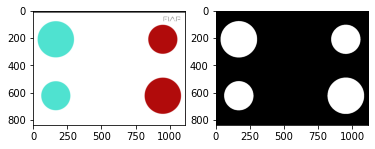

In [ ]:
%matplotlib inline
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


#azul
image_lower_hsv_a = np.array([70, 50, 100])  
image_upper_hsv_a = np.array([100, 255, 255])
mask_hsv_a = cv2.inRange(img_hsv, image_lower_hsv_a, image_upper_hsv_a)


#vermelho
image_lower_hsv_v = np.array([0, 50, 100])  
image_upper_hsv_v = np.array([15, 255, 255])
mask_hsv_v = cv2.inRange(img_hsv, image_lower_hsv_v, image_upper_hsv_v)

#Usar 2 masks
mask = cv2.bitwise_or(mask_hsv_a, mask_hsv_v)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)
plt.show()


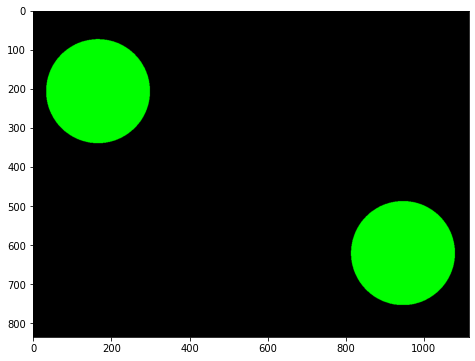

In [ ]:
contornos, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 
#contornos_img = mask_rgb.copy() 
contornos_img = np.zeros_like(mask_rgb)

maior = None
maior2 = None
maior_area = 0
maior_area2 = 0
for c in contornos:
    area = cv2.contourArea(c)
    if area > maior_area:
        maior_area2 = maior_area
        maior_area = area
        maior2 = maior
        maior = c
    elif area > maior_area2 :
        maior_area2 = area
        maior2 = c

cv2.drawContours(contornos_img, [maior], -1, [0, 255, 0], -1)
cv2.drawContours(contornos_img, [maior2], -1, [0, 255, 0], -1)

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

{'m00': 55095.0, 'm10': 52105194.0, 'm01': 34166726.5, 'm20': 49519378681.166664, 'm11': 32312518759.25, 'm02': 21429592969.0, 'm30': 47289392689844.0, 'm21': 30708853143849.75, 'm12': 20266559457923.082, 'm03': 13588758688165.25, 'mu20': 241744743.82868195, 'mu11': -103304.95620727539, 'mu02': 241368997.20941544, 'mu30': -1020892.015625, 'mu21': -697692.7378234863, 'mu12': 971555.6920471191, 'mu03': 742714.43359375, 'nu20': 0.07964025929445118, 'nu11': -3.403272959919971e-05, 'nu02': 0.079516473528881, 'nu30': -1.432845416330278e-06, 'nu21': -9.79227798921796e-07, 'nu12': 1.363600751845488e-06, 'nu03': 1.0424167840764556e-06}
{'m00': 55067.0, 'm10': 9135873.0, 'm01': 11383915.5, 'm20': 1756938091.8333333, 'm11': 1888568920.75, 'm02': 2594748172.333333, 'm30': 371539114257.5, 'm21': 363183904776.9167, 'm12': 430444918997.0833, 'm03': 636203861562.75, 'mu20': 241254007.4973607, 'mu11': -75934.62130236626, 'mu02': 241368977.6951604, 'mu30': 4525078.399291992, 'mu21': 13915.804473876953, 

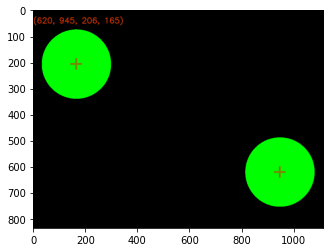

In [ ]:
M = cv2.moments(maior)
print( M )

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])


M2 = cv2.moments(maior2)
print( M2 )

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])


print("centro de massa na possição: ",cx, cy)
print("centro de massa na possição 2: ",cx2, cy2)

size = 20
color = (128,128,0)

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)


cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)
# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx, cy2, cx2
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

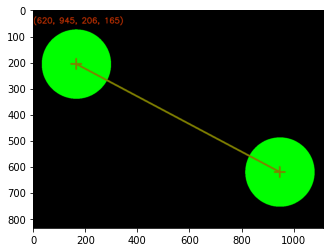

In [ ]:
cv2.line(contornos_img,(cx,cy),(cx2,cy2),color,5)

plt.imshow(contornos_img);

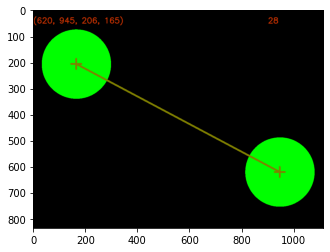

In [ ]:
deltaY = cy - cy2 
deltaX = cx - cx2

angulo = math.atan2(deltaY,deltaX)
grau = math.degrees(angulo)
around = math.ceil(grau)

cv2.putText(contornos_img, str(around), (900,50), font,1,(200,50,0),2,cv2.LINE_AA)
plt.imshow(contornos_img);